# The weak form formulation is as follows:

$ \int _{xa}^{xb}\left(D\cdot \frac{d}{dx}\left(W\right)\cdot \frac{d}{dx}\left(C\right)+U\cdot W\cdot \frac{d}{dx}\left(C\right)\right)\:dx-W\left(xa\right)Q1-W\left(xb\right)Q2 $

# This is the main solver


<IPython.core.display.Javascript object>


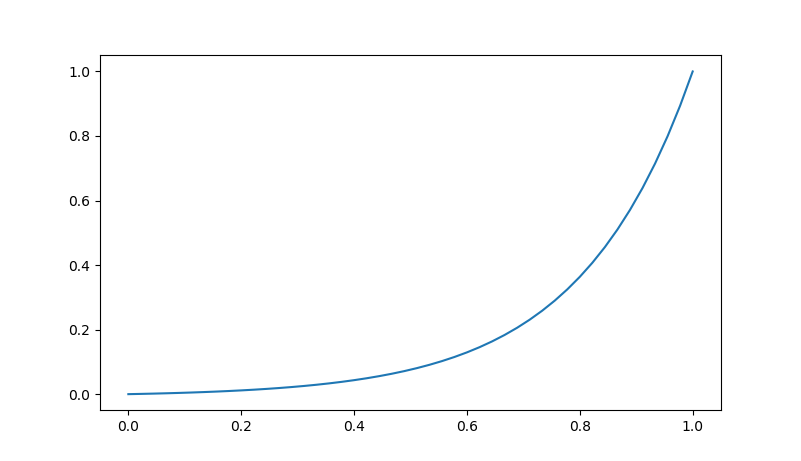

0.5625


In [12]:
import numpy as np
import sympy as sym
from sympy.utilities.lambdify import lambdify
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt
import math
from time import process_time
tick = process_time()
def MyQuad(F,arg):
    return 0.4679139346*(F(arg[0])+F(-arg[0]))+ 0.3607615730*(F(arg[1])+F(-arg[1]))+0.1713244924*(F(arg[2])+F(-arg[2]));
arg = [0.2386191861, 0.6612093865, 0.9324695142]
L , D , u = 1, 2, 10
n = 15
he =L/n
N = n*3+1         #number of nodes
dx = np.arange(0,L+L/(N),L/(N-1))
x = sym.symbols('x')
si1 = sym.Function('si1')
si2 = sym.Function('si2')
si3 = sym.Function('si3')
si4 = sym.Function('si4')
si1 = (x+1/3)*(x-1/3)*(x-1)*(-9/16)
si2 = (x+1)*(x-1/3)*(x-1)*(27/16)
si3 = (x+1)*(x+1/3)*(x-1)*(-27/16)
si4 = (x+1)*(x+1/3)*(x-1/3)*(9/16)
Dsi1 = sym.diff(si1,x,1)
Dsi2 = sym.diff(si2,x,1)
Dsi3 = sym.diff(si3,x,1)
Dsi4 = sym.diff(si4,x,1)
# generating the stiffness matrix
k = np.zeros([4,4])
sis = [si1,si2,si3,si4]
Dsis = [Dsi1,Dsi2,Dsi3,Dsi4]
for i in range(4):
    for j in range(4):
        f = D*(2/he)*Dsis[i]*Dsis[j]+u*sis[i]*Dsis[j]
        F = lambdify(x,f)
        k[i,j]  = MyQuad(F,arg)

# generating the Connectivity matrix
B = np.zeros([n,4], dtype=int)
mesh = np.zeros(N, dtype=int)
for i in range(math.ceil(N/2)):
    mesh[i] = 2*i+1
    mesh[N-1-i] = 2*(1+i)
if n %2 == 0:
    mesh[math.floor(N/2)] -=1
for i in range(n):
    for j in range(3*i,(3*i)+4):
        B[i,j-3*i] = mesh[j]

#Matrix System
row = np.array([])
col = np.array([])
data = np.array([])
for e in range(n):
    for i in range(4):
        for j in range(4):
            row = np.append(row,B[e,i]-1)
            col = np.append(col,B[e,j]-1)
            data = np.append(data,k[i,j])

indecies = np.where(row ==0)
for i in indecies:
    data[i] = 0
indecies = np.where(row ==1)
for i in indecies:
    data[i] = 0
row = np.append(row,0)
col = np.append(col,0)
data = np.append(data,1)
row = np.append(row,1)
col = np.append(col,1)
data = np.append(data,1)
BIGK = csr_matrix((data, (row, col)), shape=(N, N))
F_row = np.array([1])
F_col = np.array([0])
F_data = np.array([1])
BIGF = csr_matrix((F_data, (F_row, F_col)), shape=(N, 1))
u = spsolve(BIGK,BIGF)
#solving
U = np.zeros(N)
for i in range(N):
    U[i] = u[mesh[i]-1]
#%matplotlib notebook
plt.plot(dx,U)
plt.show()
tock = process_time()
print(tock-tick)


![Comsol Results](comsoln15.png)

# It was put into a function in addition to new function for Error Esmitation, used for plotting later

In [12]:
import numpy as np
import sympy as sym
from sympy.utilities.lambdify import lambdify
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt
import math
from time import process_time
def main(n):
    def MyQuad(F,arg):
        return 0.4679139346*(F(arg[0])+F(-arg[0]))+ 0.3607615730*(F(arg[1])+F(-arg[1]))+0.1713244924*(F(arg[2])+F(-arg[2]));
    arg = [0.2386191861, 0.6612093865, 0.9324695142]
    L , D , u = 1, 2, 10
    he =L/n
    N = n*3+1         #number of nodes
    dx = np.arange(0,L+L/(N),L/(N-1))
    x = sym.symbols('x')
    si1 = sym.Function('si1')
    si2 = sym.Function('si2')
    si3 = sym.Function('si3')
    si4 = sym.Function('si4')
    si1 = (x+1/3)*(x-1/3)*(x-1)*(-9/16)
    si2 = (x+1)*(x-1/3)*(x-1)*(27/16)
    si3 = (x+1)*(x+1/3)*(x-1)*(-27/16)
    si4 = (x+1)*(x+1/3)*(x-1/3)*(9/16)
    Dsi1 = sym.diff(si1,x,1)
    Dsi2 = sym.diff(si2,x,1)
    Dsi3 = sym.diff(si3,x,1)
    Dsi4 = sym.diff(si4,x,1)
    # generating the stiffness matrix
    k = np.zeros([4,4])
    sis = [si1,si2,si3,si4]
    Dsis = [Dsi1,Dsi2,Dsi3,Dsi4]
    for i in range(4):
        for j in range(4):
            f = D*(2/he)*Dsis[i]*Dsis[j]+u*sis[i]*Dsis[j]
            F = lambdify(x,f)
            k[i,j]  = MyQuad(F,arg)

    # generating the Connectivity matrix
    B = np.zeros([n,4], dtype=int)
    mesh = np.zeros(N, dtype=int)
    for i in range(math.ceil(N/2)):
        mesh[i] = 2*i+1
        mesh[N-1-i] = 2*(1+i)
    if n %2 == 0:
        mesh[math.floor(N/2)] -=1
    for i in range(n):
        for j in range(3*i,(3*i)+4):
            B[i,j-3*i] = mesh[j]

    #Matrix System
    row = np.array([])
    col = np.array([])
    data = np.array([])
    for e in range(n):
        for i in range(4):
            for j in range(4):
                row = np.append(row,B[e,i]-1)
                col = np.append(col,B[e,j]-1)
                data = np.append(data,k[i,j])

    indecies = np.where(row ==0)
    for i in indecies:
        data[i] = 0
    indecies = np.where(row ==1)
    for i in indecies:
        data[i] = 0
    row = np.append(row,0)
    col = np.append(col,0)
    data = np.append(data,1)
    row = np.append(row,1)
    col = np.append(col,1)
    data = np.append(data,1)
    BIGK = csr_matrix((data, (row, col)), shape=(N, N))
    F_row = np.array([1])
    F_col = np.array([0])
    F_data = np.array([1])
    BIGF = csr_matrix((F_data, (F_row, F_col)), shape=(N, 1))
    u = spsolve(BIGK,BIGF)
    #solving
    U = np.zeros(N)
    for i in range(N):
        U[i] = u[mesh[i]-1]
    
    def YR(x):
        return (1/(1-math.exp(5)))+(1/(math.exp(5)-1))*(math.exp(5*x))
    Real = np.zeros([len(dx)]) 
    for i in range (len(dx)):
        Real[i] = YR(dx[i])
    def error(U, Y):
        a, b= 0, 0
        for i in range(len(U)):
            a += (U[i]-Y[i])**2
            b += Y[i]**2
        return 100*(math.sqrt(a))/(math.sqrt(b))
    for i in range (len(dx)):
        Real[i] = YR(dx[i])
    err = error(U,Real)
    return dx,U,err;

# This simple code used the above functions to plot some solution and their respective Error

<IPython.core.display.Javascript object>


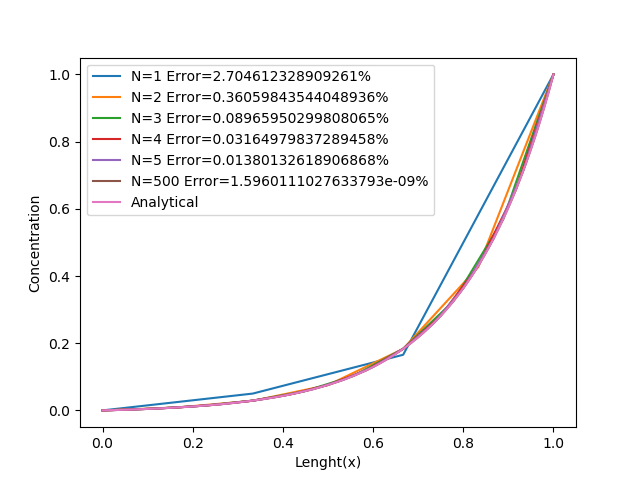

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import math
def Y(x):
    return  (1/(1-math.exp(5)))+(1/(math.exp(5)-1))*(math.exp(5*x))

ax,ay,ea = main(1)
bx,by,eb = main(2)
cx,cy,ec = main(3)
dx,dy,ed = main(4)
ex,ey,ee = main(5)
fx,fy,ef = main(500)
x_vals = np.arange(0, 1+1/1501, 1/1500)
y_vals = np.zeros([len(x_vals)]) 
for i in range (len(x_vals)):
    y_vals[i] = Y(x_vals[i])
%matplotlib notebook
plt.plot(ax,ay,  label = 'N=1 Error='+str(ea)+'%')
plt.plot(bx,by, label = 'N=2 Error='+str(eb)+'%')
plt.plot(cx,cy, label = 'N=3 Error='+str(ec)+'%')
plt.plot(dx,dy, label = 'N=4 Error='+str(ed)+'%')
plt.plot(ex,ey, label = 'N=5 Error='+str(ee)+'%')
plt.plot(fx,fy, label = 'N=500 Error='+str(ef)+'%')
plt.plot(x_vals, y_vals, label = 'Analytical')
plt.xlabel("Lenght(x)")
plt.ylabel("Concentration")
plt.legend()
plt.show()


# Here we can see the error% as a function of the number of elements

<IPython.core.display.Javascript object>


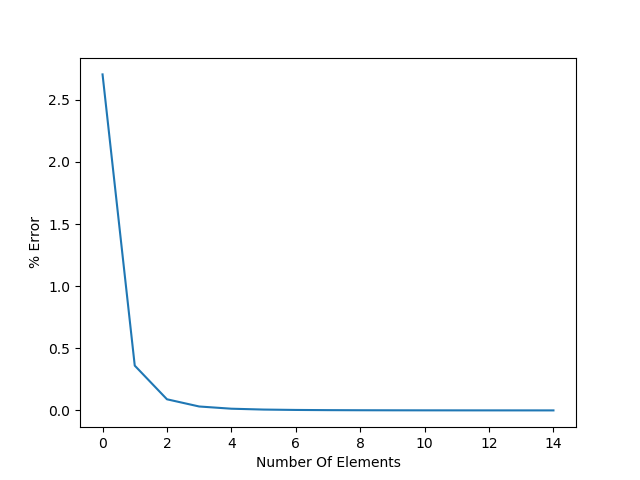

In [3]:
import numpy as np
import matplotlib.pyplot as plt
f = 15
Nu = np.zeros([f])
Err = np.zeros([f])
for i in range(f):
    Nu[i] = i
    a, b, Err[i] = main(i+1)
%matplotlib notebook
plt.xlabel("Number Of Elements")
plt.ylabel("% Error")
plt.plot(Nu,Err)
plt.show()


![](EroorvsN10000.png)

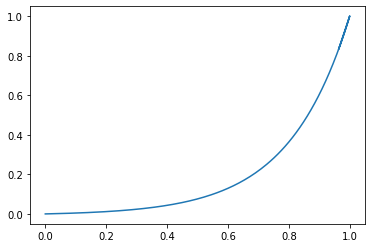

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
xl = pd.read_excel("Comsol_Data_File.xlsx")
Xs = xl['X']
Ys = xl['Y']
plt.plot(Xs,Ys)
plt.show()


<IPython.core.display.Javascript object>


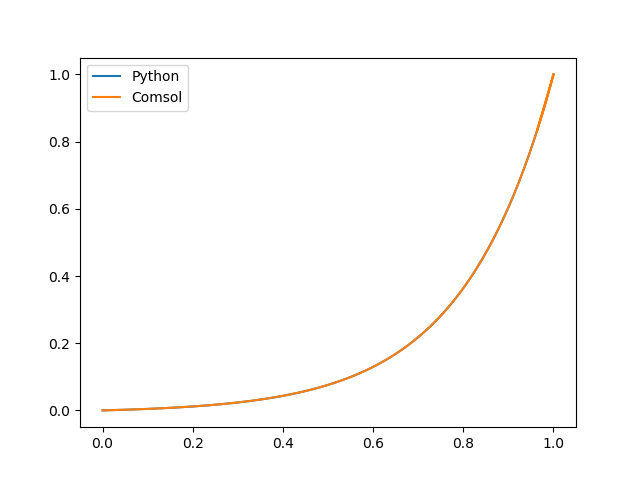

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
xl = pd.read_excel("Comsol_Data_File.xlsx")
Xs = xl['X']
Ys = xl['Y']
X,Y,Err = main(57)
%matplotlib notebook
plt.plot(X,Y ,label = 'Python')
plt.plot(Xs,Ys,label = 'Comsol')
plt.legend()
plt.show()